In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [7]:
noise = np.random.randn(len(x_data))

In [11]:
y_true = .5 * x_data + 5 + noise

In [15]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y Data'])

In [17]:
my_data = pd.concat([x_df, y_df], axis=1)

In [19]:
my_data.head()

,X Data,Y Data
0,0.00000,3.964023
1,0.00001,5.679249
2,0.00002,4.995170
3,0.00003,5.229778
4,0.00004,3.831131


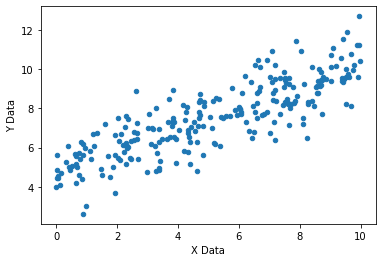

In [22]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y Data')

In [156]:
batch_size = 30
m = tf.Variable(.81)
b = tf.Variable(.17)

In [157]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [158]:
y_model = m * xph + b

In [159]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [160]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [161]:
init = tf.global_variables_initializer()

0.48777512 4.9221644


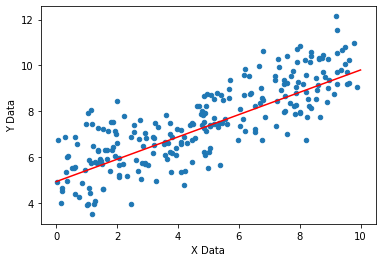

In [182]:
batch_size = 10
m = tf.Variable(.81)
b = tf.Variable(.17)

xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

y_model = m * xph + b

error = tf.reduce_sum(tf.square(yph - y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    batches = 1000
    for batch in range(batches):
        random_index = np.random.randint(len(x_data), size=batch_size)
        feed = {xph: x_data[random_index], yph: y_true[random_index]}
        session.run(train, feed_dict=feed)
        model_m, model_b = session.run([m, b])
print(model_m, model_b)
y_predict = x_data * model_m + model_b
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y Data')
plt.plot(x_data, y_predict, 'r')

In [183]:
feature_columns =[tf.feature_column.numeric_column('x', shape=[1])]

In [184]:
estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpc4wxwnb9', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [186]:
from sklearn.model_selection import train_test_split

In [193]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [194]:
input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True
)

In [195]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False
)

In [196]:
eval_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False
)

In [198]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/tmpc4wxwnb9/model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into /tmp/tmpc4wxwnb9/model.ckpt.
INFO:tensorflow:loss = 11.633975, step = 1001
INFO:tensorflow:global_step/sec: 1286.44
INFO:tensorflow:loss = 6.642703, step = 1101 (0.081 sec)
INFO:tensorflow:global_step/sec: 1266.3
INFO:tensorflow:loss = 5.265115, step = 1201 (0.078 sec)
INFO:tensorflow:global_step/sec: 1351.42
INFO:tensorflow:loss = 6.926426, step = 1301 (0.078 sec)
INFO:tensorflow:global_step/sec: 832.524
INFO:tensorflow:loss = 6.799516, step = 1401 (0.117 sec)
INFO:tensorflow:global_step/sec: 868.109
INFO:tensorflow:loss = 9.740625, step = 1501 (0.113 sec)
INFO:tensorflow:global_step/sec: 1390.1
INFO:tensorflow:loss = 17.310528, step = 1601 (0.072 sec)
INFO:tensorflow:global_step/sec: 1411.66
INFO:tensorflow:loss = 17.940866, step = 1701 (0.072 sec)
INFO:tensorflow:global_step/sec: 1316.87
INFO:tensorflow:loss = 10.9347

In [199]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2020-04-05-14:36:24
INFO:tensorflow:Restoring parameters from /tmp/tmpc4wxwnb9/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [200]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2020-04-05-14:37:34
INFO:tensorflow:Restoring parameters from /tmp/tmpc4wxwnb9/model.ckpt-2000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23/1000]
INFO:tensorflow:Evaluati

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorflow:Evaluation [889/1000]
INFO:tensorf

In [201]:
print('TRAINING DATA METRICS:')
print(train_metrics)

TRAINING DATA METRICS:
{'average_loss': 0.99558544, 'loss': 7.9646835, 'global_step': 2000}


In [203]:
print('EVALUATION DATA METRICS:')
print(eval_metrics)

EVALUATION DATA METRICS:
{'average_loss': 1.0367917, 'loss': 8.294333, 'global_step': 2000}


In [206]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle=False)
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /tmp/tmpc4wxwnb9/model.ckpt-2000


[{'predictions': array([4.921341], dtype=float32)},
 {'predictions': array([5.482634], dtype=float32)},
 {'predictions': array([6.043927], dtype=float32)},
 {'predictions': array([6.6052203], dtype=float32)},
 {'predictions': array([7.1665134], dtype=float32)},
 {'predictions': array([7.727806], dtype=float32)},
 {'predictions': array([8.2891], dtype=float32)},
 {'predictions': array([8.850392], dtype=float32)},
 {'predictions': array([9.411686], dtype=float32)},
 {'predictions': array([9.972979], dtype=float32)}]

In [207]:
predictions = list()

for prediction in estimator.predict(input_fn=input_fn_predict):
    predictions.append(prediction['predictions'])

INFO:tensorflow:Restoring parameters from /tmp/tmpc4wxwnb9/model.ckpt-2000


In [208]:
predictions

[array([4.921341], dtype=float32),
 array([5.482634], dtype=float32),
 array([6.043927], dtype=float32),
 array([6.6052203], dtype=float32),
 array([7.1665134], dtype=float32),
 array([7.727806], dtype=float32),
 array([8.2891], dtype=float32),
 array([8.850392], dtype=float32),
 array([9.411686], dtype=float32),
 array([9.972979], dtype=float32)]

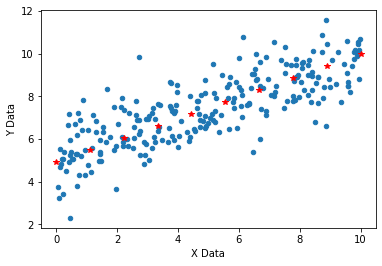

In [212]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y Data')
plt.plot(brand_new_data, predictions, '*r')

In [217]:
diabetes = pd.read_csv('/home/ricardo/projects/trainnig/tensorflow/Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [219]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [220]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [221]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [228]:
feature_columns = list()
for column in cols_to_norm:
    feature_columns.append(tf.feature_column.numeric_column(column))
age_numerical_column = tf.feature_column.numeric_column('Age')

In [229]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])

In [230]:
age_bucket = tf.feature_column.bucketized_column(age_numerical_column, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [231]:
feature_columns.append(assigned_group)
feature_columns.append(age_bucket)

In [232]:
feature_columns

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 _BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_

In [233]:
x_data = diabetes.drop('Class', axis=1)

In [234]:
labels = diabetes['Class']

In [235]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [236]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [237]:
model = tf.estimator.LinearClassifier(feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxy4jidk4', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [238]:
model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpxy4jidk4/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 488.038
INFO:tensorflow:loss = 8.042556, step = 101 (0.212 sec)
INFO:tensorflow:global_step/sec: 313.846
INFO:tensorflow:loss = 4.566565, step = 201 (0.315 sec)
INFO:tensorflow:global_step/sec: 386.085
INFO:tensorflow:loss = 3.5444229, step = 301 (0.263 sec)
INFO:tensorflow:global_step/sec: 355.935
INFO:tensorflow:loss = 3.8107123, step = 401 (0.276 sec)
INFO:tensorflow:global_step/sec: 377.918
INFO:tensorflow:loss = 7.266923, step = 501 (0.269 sec)
INFO:tensorflow:global_step/sec: 385.209
INFO:tensorflow:loss = 4.6630745, step = 601 (0.259 sec)
INFO:tensorflow:global_step/sec: 381.046
INFO:tensorflow:loss = 6.110938, step = 701 (0.261 sec)
INFO:tensorflow:global_step/sec: 322.385
INFO:tensorflow:loss = 6.9018703, step = 801 (0.316 sec)
INFO:tensorflow:global_step/sec: 333.244
INFO:tensorflow:lo

In [239]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [240]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-04-05-15:15:56
INFO:tensorflow:Restoring parameters from /tmp/tmpxy4jidk4/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2020-04-05-15:15:56
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.79716045, auc_precision_recall = 0.63832587, average_loss = 0.5291154, global_step = 1000, label/mean = 0.35064936, loss = 5.0927353, prediction/mean = 0.3547977


In [241]:
results

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79716045,
 'auc_precision_recall': 0.63832587,
 'average_loss': 0.5291154,
 'label/mean': 0.35064936,
 'loss': 5.0927353,
 'prediction/mean': 0.3547977,
 'global_step': 1000}

In [242]:
pred_iput_func = tf.estimator.inputs.pandas_input_fn(x=X_test, batch_size=10, num_epochs=1, shuffle=False)

In [243]:
predictions = model.predict(pred_iput_func)

In [244]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from /tmp/tmpxy4jidk4/model.ckpt-1000


In [246]:
my_pred[0]

{'logits': array([0.01598197], dtype=float32),
 'logistic': array([0.5039954], dtype=float32),
 'probabilities': array([0.49600458, 0.5039954 ], dtype=float32),
 'class_ids': array([1]),
 'classes': array([b'1'], dtype=object)}

In [247]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp21np8ex8', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [248]:
feature_columns = list()
for column in cols_to_norm:
    feature_columns.append(tf.feature_column.numeric_column(column))
age_numerical_column = tf.feature_column.numeric_column('Age')
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])
embedded_assigned_group = tf.feature_column.embedding_column(assigned_group, dimension=4)
age_bucket = tf.feature_column.bucketized_column(age_numerical_column, boundaries=[20, 30, 40, 50, 60, 70, 80])
feature_columns.append(embedded_assigned_group)
feature_columns.append(age_bucket)

In [249]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train, y_train, batch_size=10, num_epochs=1000, shuffle=True)

In [250]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10], feature_columns=feature_columns, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsl30bael', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [251]:
dnn_model.train(input_fn=input_func)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpsl30bael/model.ckpt.
INFO:tensorflow:loss = 7.634859, step = 1
INFO:tensorflow:global_step/sec: 323.683
INFO:tensorflow:loss = 5.1013536, step = 101 (0.313 sec)
INFO:tensorflow:global_step/sec: 352.103
INFO:tensorflow:loss = 3.0653276, step = 201 (0.286 sec)
INFO:tensorflow:global_step/sec: 356.519
INFO:tensorflow:loss = 3.399195, step = 301 (0.280 sec)
INFO:tensorflow:global_step/sec: 392.311
INFO:tensorflow:loss = 3.861764, step = 401 (0.267 sec)
INFO:tensorflow:global_step/sec: 348.932
INFO:tensorflow:loss = 6.0616145, step = 501 (0.274 sec)
INFO:tensorflow:global_step/sec: 294.847
INFO:tensorflow:loss = 6.5914063, step = 601 (0.339 sec)
INFO:tensorflow:global_step/sec: 277.667
INFO:tensorflow:loss = 3.861094, step = 701 (0.360 sec)
INFO:tensorflow:global_step/sec: 265.16
INFO:tensorflow:loss = 7.4726863, step = 801 (0.381 sec)
INFO:tensorflow:global_step/sec: 186.368
INFO:tensorflow:lo

INFO:tensorflow:global_step/sec: 411.879
INFO:tensorflow:loss = 6.5578384, step = 8301 (0.245 sec)
INFO:tensorflow:global_step/sec: 417.833
INFO:tensorflow:loss = 6.5888634, step = 8401 (0.238 sec)
INFO:tensorflow:global_step/sec: 426.941
INFO:tensorflow:loss = 2.9905136, step = 8501 (0.232 sec)
INFO:tensorflow:global_step/sec: 426.985
INFO:tensorflow:loss = 4.483784, step = 8601 (0.239 sec)
INFO:tensorflow:global_step/sec: 420.42
INFO:tensorflow:loss = 5.0154386, step = 8701 (0.233 sec)
INFO:tensorflow:global_step/sec: 419.656
INFO:tensorflow:loss = 2.7690058, step = 8801 (0.243 sec)
INFO:tensorflow:global_step/sec: 426.423
INFO:tensorflow:loss = 3.1004524, step = 8901 (0.232 sec)
INFO:tensorflow:global_step/sec: 423.863
INFO:tensorflow:loss = 5.07185, step = 9001 (0.237 sec)
INFO:tensorflow:global_step/sec: 420.722
INFO:tensorflow:loss = 7.460636, step = 9101 (0.238 sec)
INFO:tensorflow:global_step/sec: 426.768
INFO:tensorflow:loss = 3.6953547, step = 9201 (0.234 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 421.309
INFO:tensorflow:loss = 3.0309432, step = 16601 (0.233 sec)
INFO:tensorflow:global_step/sec: 420.408
INFO:tensorflow:loss = 2.7294736, step = 16701 (0.243 sec)
INFO:tensorflow:global_step/sec: 427.055
INFO:tensorflow:loss = 0.89202285, step = 16801 (0.229 sec)
INFO:tensorflow:global_step/sec: 417.516
INFO:tensorflow:loss = 6.900011, step = 16901 (0.241 sec)
INFO:tensorflow:global_step/sec: 420.21
INFO:tensorflow:loss = 5.807922, step = 17001 (0.240 sec)
INFO:tensorflow:global_step/sec: 422.015
INFO:tensorflow:loss = 2.79673, step = 17101 (0.237 sec)
INFO:tensorflow:global_step/sec: 420.433
INFO:tensorflow:loss = 4.0780845, step = 17201 (0.237 sec)
INFO:tensorflow:global_step/sec: 318.979
INFO:tensorflow:loss = 2.624665, step = 17301 (0.310 sec)
INFO:tensorflow:global_step/sec: 389.607
INFO:tensorflow:loss = 2.4996219, step = 17401 (0.262 sec)
INFO:tensorflow:global_step/sec: 414.491
INFO:tensorflow:loss = 4.613018, step = 17501 (0.236 sec)
INFO:t

INFO:tensorflow:loss = 2.2348964, step = 24801 (0.349 sec)
INFO:tensorflow:global_step/sec: 313.246
INFO:tensorflow:loss = 2.4526057, step = 24901 (0.314 sec)
INFO:tensorflow:global_step/sec: 299.09
INFO:tensorflow:loss = 3.141371, step = 25001 (0.340 sec)
INFO:tensorflow:global_step/sec: 299.394
INFO:tensorflow:loss = 1.0607837, step = 25101 (0.335 sec)
INFO:tensorflow:global_step/sec: 307.212
INFO:tensorflow:loss = 1.165128, step = 25201 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.266
INFO:tensorflow:loss = 2.3495398, step = 25301 (0.318 sec)
INFO:tensorflow:global_step/sec: 296.196
INFO:tensorflow:loss = 0.8017805, step = 25401 (0.349 sec)
INFO:tensorflow:global_step/sec: 302.295
INFO:tensorflow:loss = 2.0719466, step = 25501 (0.320 sec)
INFO:tensorflow:global_step/sec: 239.779
INFO:tensorflow:loss = 3.6642742, step = 25601 (0.425 sec)
INFO:tensorflow:global_step/sec: 272.95
INFO:tensorflow:loss = 3.9174266, step = 25701 (0.373 sec)
INFO:tensorflow:global_step/sec: 333.466
INFO

INFO:tensorflow:global_step/sec: 410.59
INFO:tensorflow:loss = 2.0006628, step = 33101 (0.246 sec)
INFO:tensorflow:global_step/sec: 428.975
INFO:tensorflow:loss = 2.9793606, step = 33201 (0.231 sec)
INFO:tensorflow:global_step/sec: 415.586
INFO:tensorflow:loss = 2.9002376, step = 33301 (0.241 sec)
INFO:tensorflow:global_step/sec: 424.651
INFO:tensorflow:loss = 1.1087834, step = 33401 (0.234 sec)
INFO:tensorflow:global_step/sec: 430.263
INFO:tensorflow:loss = 2.3045928, step = 33501 (0.234 sec)
INFO:tensorflow:global_step/sec: 420.898
INFO:tensorflow:loss = 1.6240549, step = 33601 (0.236 sec)
INFO:tensorflow:global_step/sec: 408.833
INFO:tensorflow:loss = 2.1154811, step = 33701 (0.247 sec)
INFO:tensorflow:global_step/sec: 404.421
INFO:tensorflow:loss = 5.6214294, step = 33801 (0.246 sec)
INFO:tensorflow:global_step/sec: 377.227
INFO:tensorflow:loss = 2.6794317, step = 33901 (0.268 sec)
INFO:tensorflow:global_step/sec: 367.257
INFO:tensorflow:loss = 3.1076992, step = 34001 (0.273 sec)
I

INFO:tensorflow:loss = 1.628946, step = 41301 (0.242 sec)
INFO:tensorflow:global_step/sec: 412.668
INFO:tensorflow:loss = 4.399637, step = 41401 (0.241 sec)
INFO:tensorflow:global_step/sec: 423.502
INFO:tensorflow:loss = 2.301256, step = 41501 (0.237 sec)
INFO:tensorflow:global_step/sec: 422.069
INFO:tensorflow:loss = 5.4238744, step = 41601 (0.237 sec)
INFO:tensorflow:global_step/sec: 418.236
INFO:tensorflow:loss = 5.162665, step = 41701 (0.238 sec)
INFO:tensorflow:global_step/sec: 420.742
INFO:tensorflow:loss = 2.1077814, step = 41801 (0.239 sec)
INFO:tensorflow:global_step/sec: 415.468
INFO:tensorflow:loss = 3.760482, step = 41901 (0.239 sec)
INFO:tensorflow:global_step/sec: 422.186
INFO:tensorflow:loss = 1.7442834, step = 42001 (0.237 sec)
INFO:tensorflow:global_step/sec: 413.858
INFO:tensorflow:loss = 1.5179224, step = 42101 (0.244 sec)
INFO:tensorflow:global_step/sec: 421.557
INFO:tensorflow:loss = 2.3804002, step = 42201 (0.238 sec)
INFO:tensorflow:global_step/sec: 426.295
INFO:

INFO:tensorflow:global_step/sec: 418.025
INFO:tensorflow:loss = 2.4872737, step = 49601 (0.244 sec)
INFO:tensorflow:global_step/sec: 427.433
INFO:tensorflow:loss = 3.848126, step = 49701 (0.231 sec)
INFO:tensorflow:global_step/sec: 426.646
INFO:tensorflow:loss = 2.4197013, step = 49801 (0.238 sec)
INFO:tensorflow:global_step/sec: 428.996
INFO:tensorflow:loss = 3.6837904, step = 49901 (0.233 sec)
INFO:tensorflow:global_step/sec: 420.67
INFO:tensorflow:loss = 2.2229612, step = 50001 (0.236 sec)
INFO:tensorflow:global_step/sec: 419.832
INFO:tensorflow:loss = 3.3723783, step = 50101 (0.233 sec)
INFO:tensorflow:global_step/sec: 420.767
INFO:tensorflow:loss = 1.0406203, step = 50201 (0.244 sec)
INFO:tensorflow:global_step/sec: 426.495
INFO:tensorflow:loss = 2.2324636, step = 50301 (0.231 sec)
INFO:tensorflow:global_step/sec: 423.482
INFO:tensorflow:loss = 2.163106, step = 50401 (0.238 sec)
INFO:tensorflow:global_step/sec: 417.871
INFO:tensorflow:loss = 3.395381, step = 50501 (0.239 sec)
INFO

In [252]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y=y_test, batch_size=10, num_epochs=1, shuffle=False)

In [253]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2020-04-05-15:28:51
INFO:tensorflow:Restoring parameters from /tmp/tmpsl30bael/model.ckpt-53700
INFO:tensorflow:Finished evaluation at 2020-04-05-15:28:52
INFO:tensorflow:Saving dict for global step 53700: accuracy = 0.6969697, accuracy_baseline = 0.64935064, auc = 0.7704527, auc_precision_recall = 0.66007835, average_loss = 0.68293774, global_step = 53700, label/mean = 0.35064936, loss = 6.573276, prediction/mean = 0.34820193


{'accuracy': 0.6969697,
 'accuracy_baseline': 0.64935064,
 'auc': 0.7704527,
 'auc_precision_recall': 0.66007835,
 'average_loss': 0.68293774,
 'label/mean': 0.35064936,
 'loss': 6.573276,
 'prediction/mean': 0.34820193,
 'global_step': 53700}